##### Data Visualization using birds data set

In [1]:
#we start by importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
#reading data
birds = pd.read_csv('birds.csv')
birds.head()

,Name,ScientificName,Category,Order,Family,Genus,ConservationStatus,MinLength,MaxLength,MinBodyMass,MaxBodyMass,MinWingspan,MaxWingspan
0,Black-bellied whistling-duck,Dendrocygna autumnalis,Ducks/Geese/Waterfowl,Anseriformes,Anatidae,Dendrocygna,LC,47.0,56.0,652.0,1020.0,76.0,94.0
1,Fulvous whistling-duck,Dendrocygna bicolor,Ducks/Geese/Waterfowl,Anseriformes,Anatidae,Dendrocygna,LC,45.0,53.0,712.0,1050.0,85.0,93.0
2,Snow goose,Anser caerulescens,Ducks/Geese/Waterfowl,Anseriformes,Anatidae,Anser,LC,64.0,79.0,2050.0,4050.0,135.0,165.0
3,Ross's goose,Anser rossii,Ducks/Geese/Waterfowl,Anseriformes,Anatidae,Anser,LC,57.3,64.0,1066.0,1567.0,113.0,116.0
4,Greater white-fronted goose,Anser albifrons,Ducks/Geese/Waterfowl,Anseriformes,Anatidae,Anser,LC,64.0,81.0,1930.0,3310.0,130.0,165.0


In [2]:
birds.columns

Index(['Name', 'ScientificName', 'Category', 'Order', 'Family', 'Genus',
       'ConservationStatus', 'MinLength', 'MaxLength', 'MinBodyMass',
       'MaxBodyMass', 'MinWingspan', 'MaxWingspan'],
      dtype='object')

<Axes: >

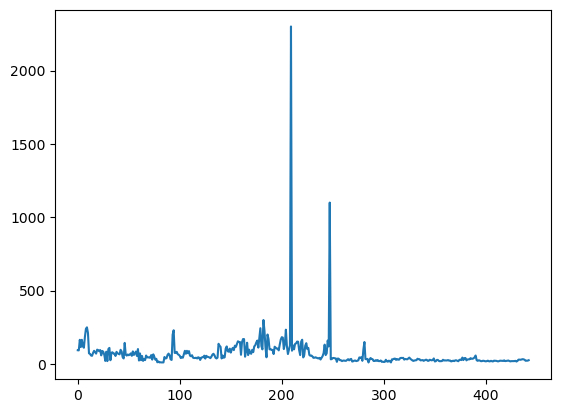

In [3]:
#line plot
wingspan = birds['MaxWingspan'] 
wingspan.plot()

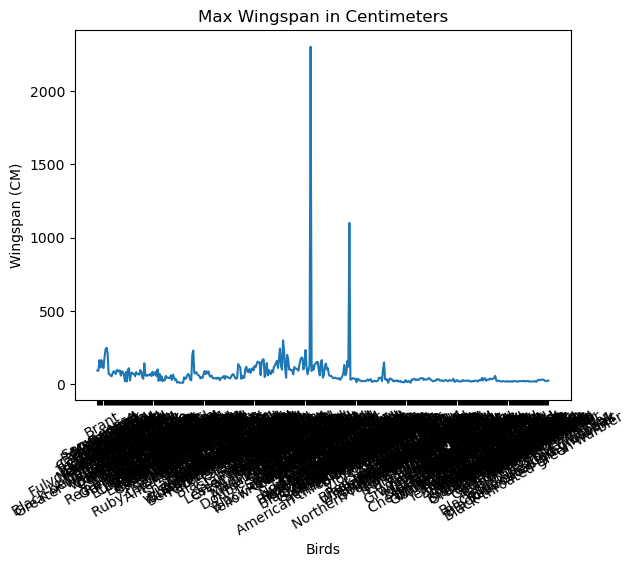

In [6]:
plt.title('Max Wingspan in Centimeters')
plt.ylabel('Wingspan (CM)')
plt.xlabel('Birds')
plt.xticks(rotation=30)
x = birds['Name'] 
y = birds['MaxWingspan']

plt.plot(x, y)

plt.show()

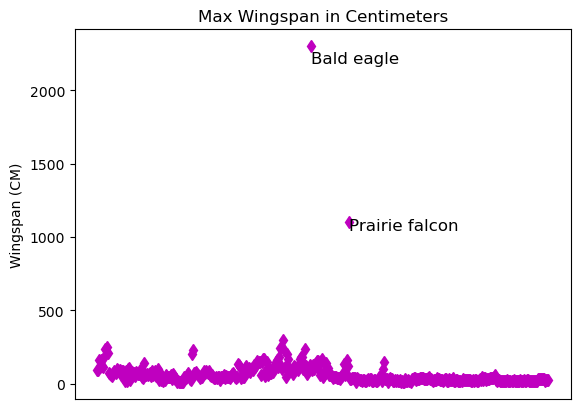

In [11]:
plt.title('Max Wingspan in Centimeters')
plt.ylabel('Wingspan (CM)')
plt.tick_params(axis='both',which='both',labelbottom=False,bottom=False)

for i in range(len(birds)):
    x = birds['Name'][i]
    y = birds['MaxWingspan'][i]
    plt.plot(x, y, 'md')
    if birds['MaxWingspan'][i] > 500:
        plt.text(x, y * (1 - 0.05), birds['Name'][i], fontsize=12)
    
plt.show()

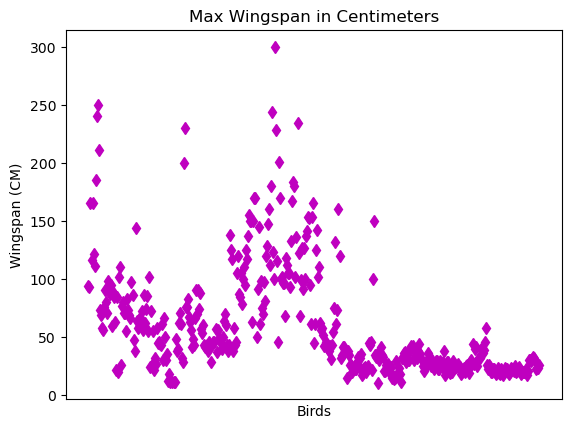

In [12]:
#filtering
plt.title('Max Wingspan in Centimeters')
plt.ylabel('Wingspan (CM)')
plt.xlabel('Birds')
plt.tick_params(axis='both',which='both',labelbottom=False,bottom=False)
for i in range(len(birds)):
    x = birds['Name'][i]
    y = birds['MaxWingspan'][i]
    if birds['Name'][i] not in ['Bald eagle', 'Prairie falcon']:
        plt.plot(x, y, 'md')
plt.show()

<Axes: title={'center': 'Birds of Minnesota'}, xlabel='Category'>

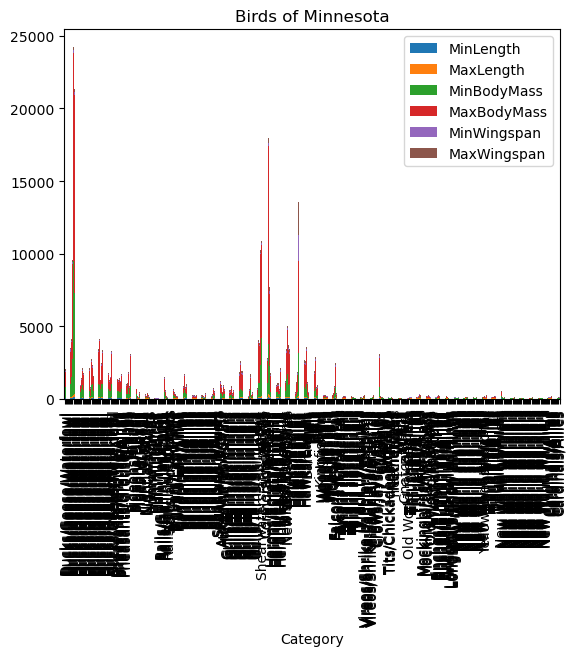

In [13]:
#barcharts
birds.plot(x='Category',
        kind='bar',
        stacked=True,
        title='Birds of Minnesota')

<Axes: >

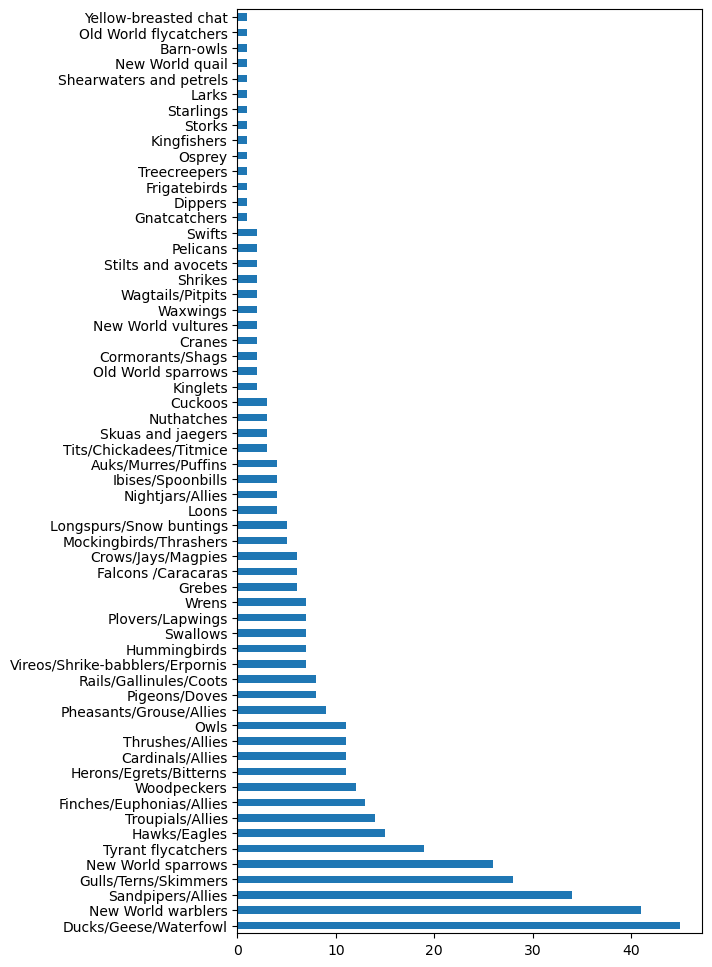

In [14]:
category_count = birds.value_counts(birds['Category'].values, sort=True)
plt.rcParams['figure.figsize'] = [6, 12]
category_count.plot.barh()

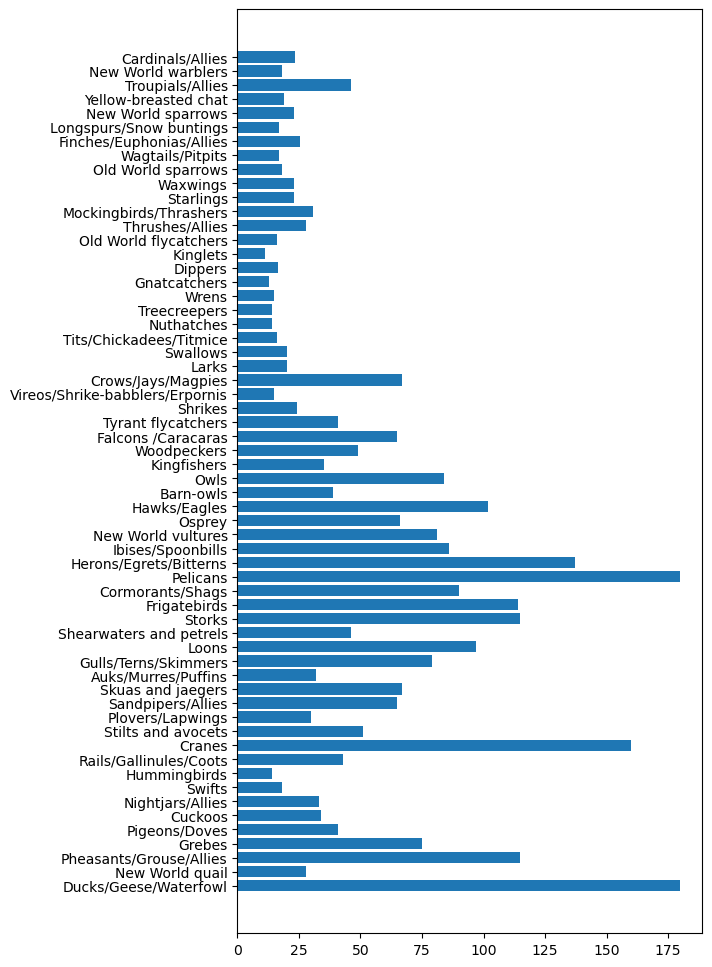

In [15]:
maxlength = birds['MaxLength']
plt.barh(y=birds['Category'], width=maxlength)
plt.rcParams['figure.figsize'] = [6, 12]
plt.show()

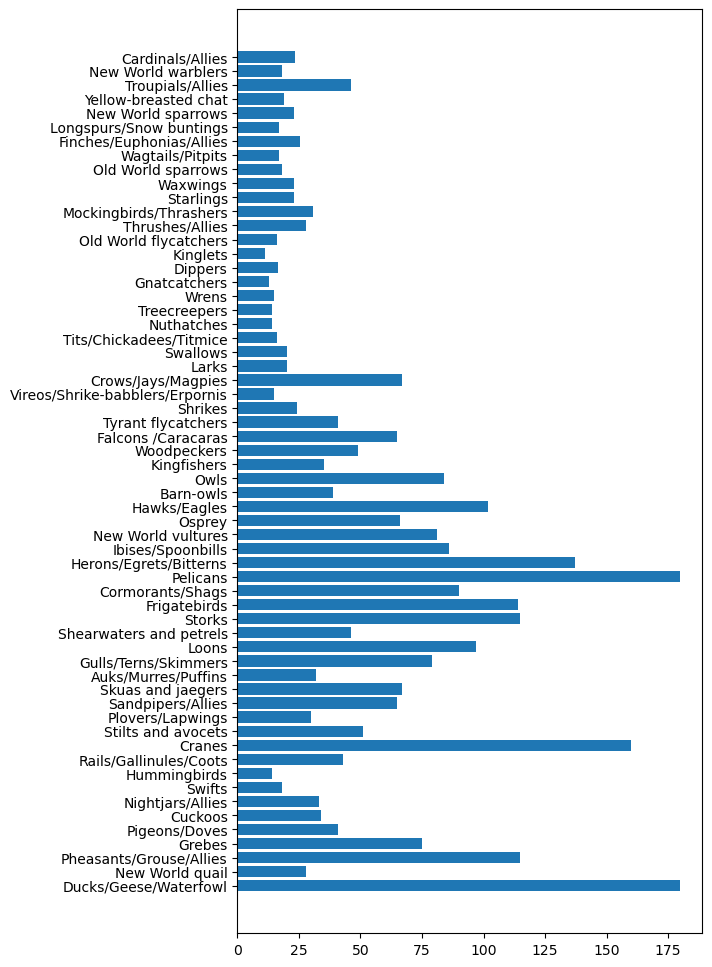

In [16]:
maxlength = birds['MaxLength']
plt.barh(y=birds['Category'], width=maxlength)
plt.rcParams['figure.figsize'] = [6, 12]
plt.show()

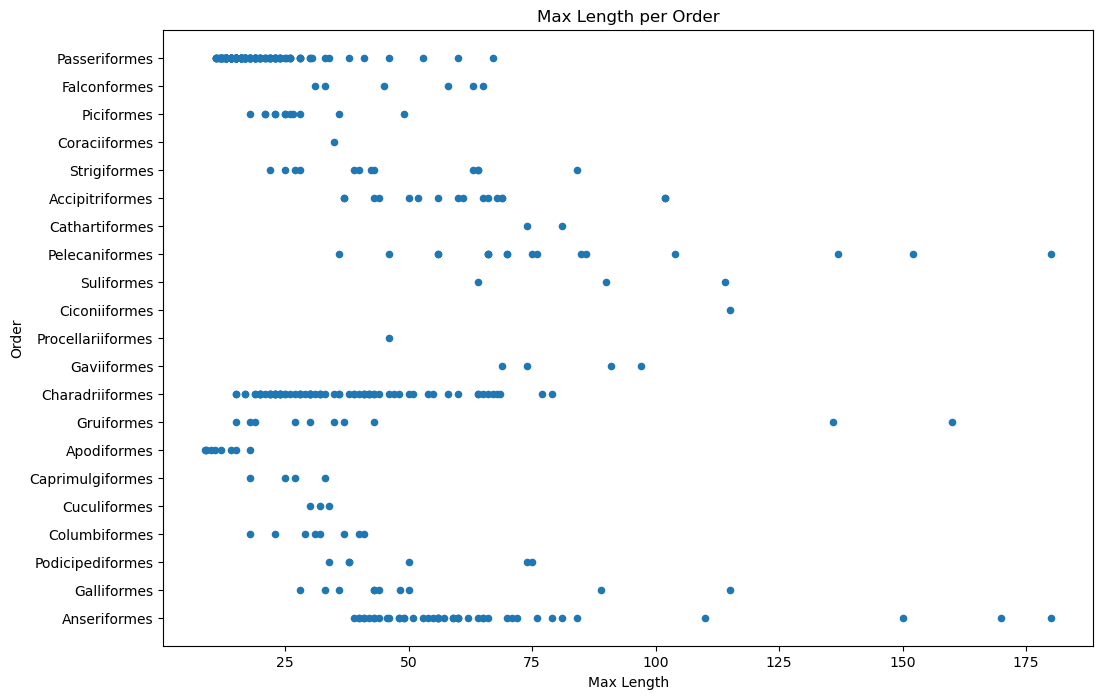

In [17]:
birds.plot(kind='scatter',x='MaxLength',y='Order',figsize=(12,8))

plt.title('Max Length per Order')
plt.ylabel('Order')
plt.xlabel('Max Length')

plt.show()

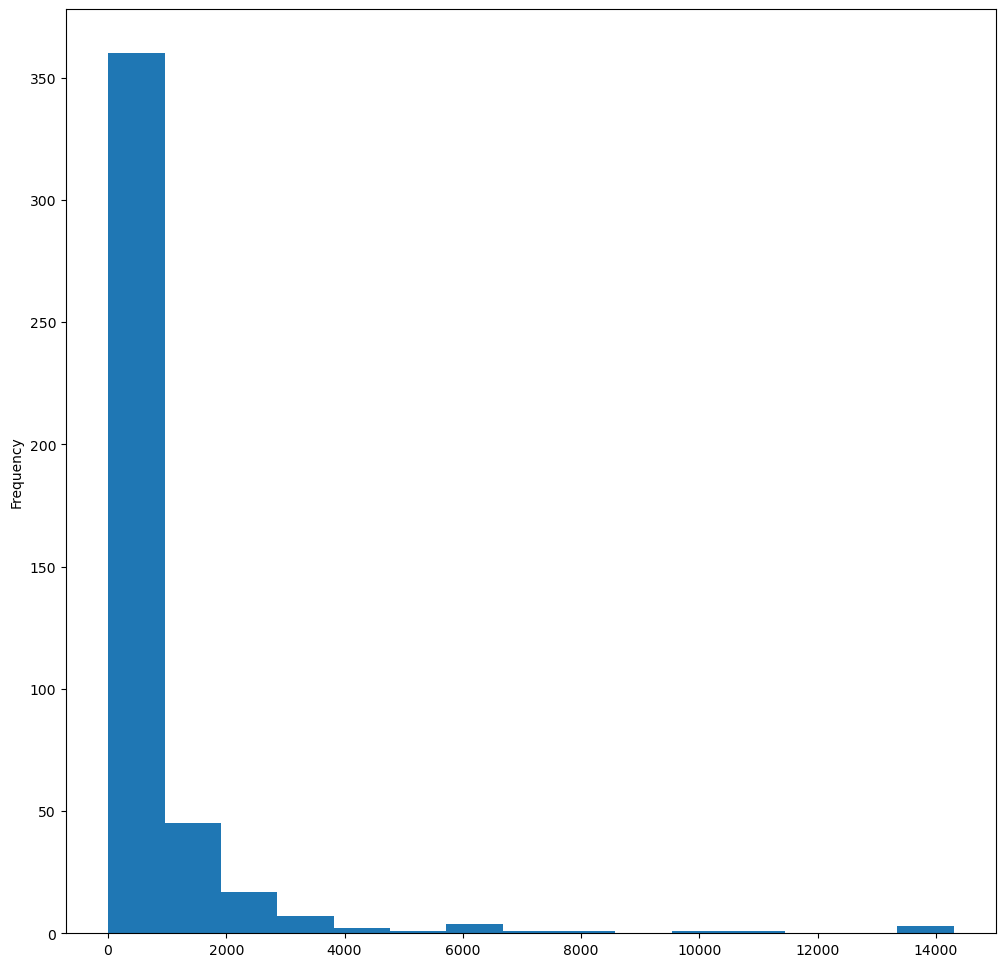

In [18]:
birds['MaxBodyMass'].plot(kind = 'hist', bins = 15, figsize = (12,12))
plt.show()

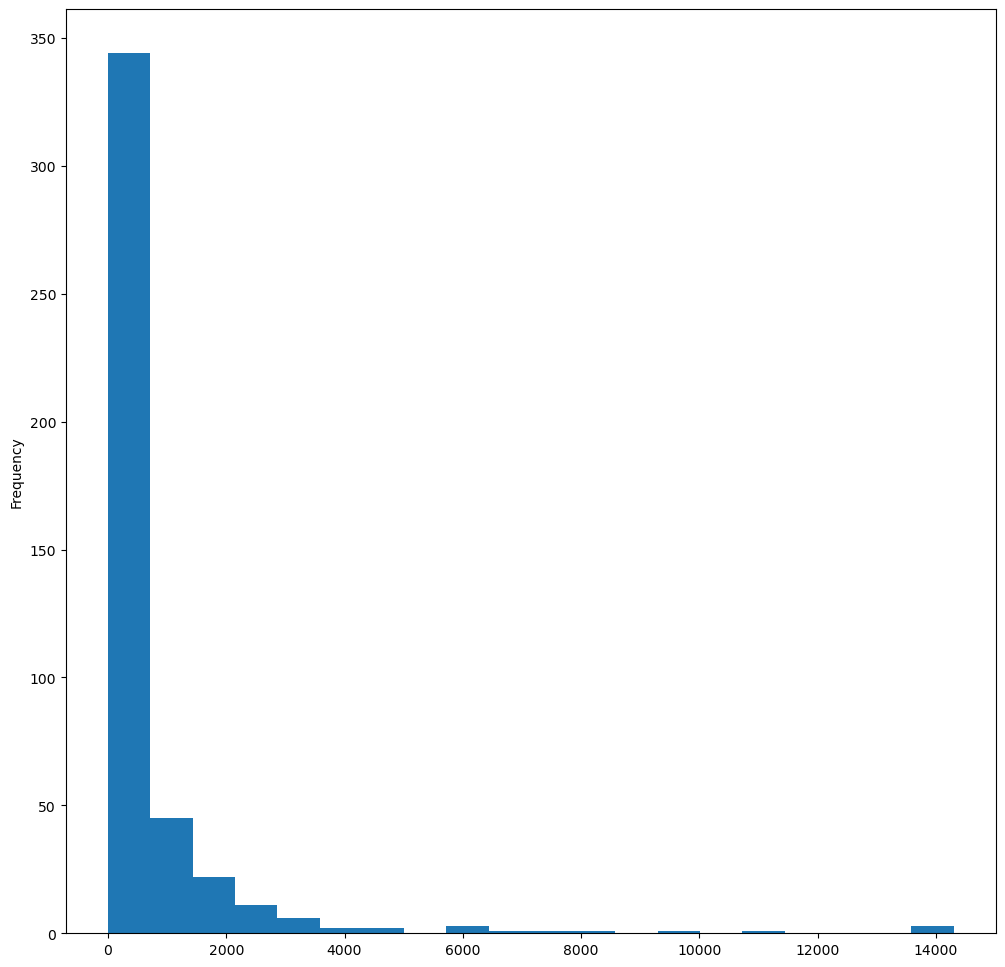

In [19]:
birds['MaxBodyMass'].plot(kind = 'hist', bins = 20, figsize = (12,12))
plt.show()

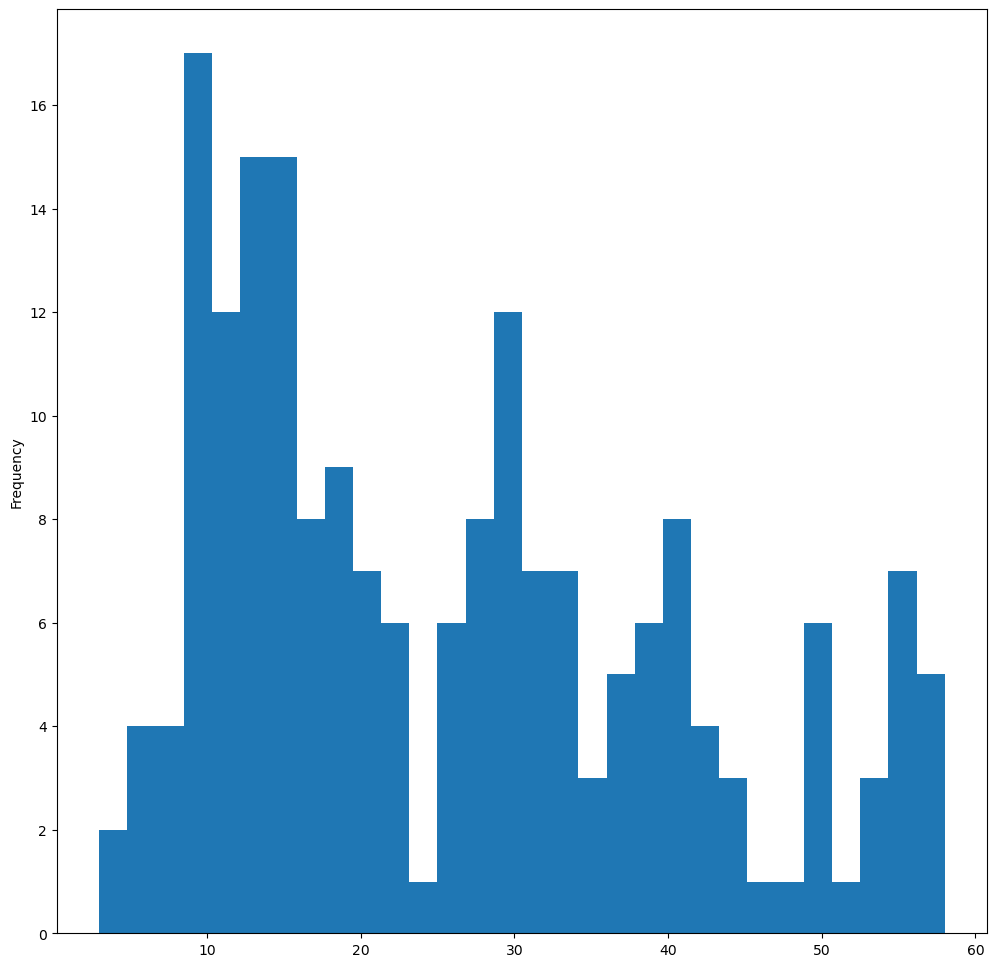

In [20]:
filter_birds = birds[(birds['MaxBodyMass'] > 1) & (birds['MaxBodyMass'] < 60)]      
filter_birds['MaxBodyMass'].plot(kind = 'hist',bins = 30,figsize = (12,12))
plt.show()  

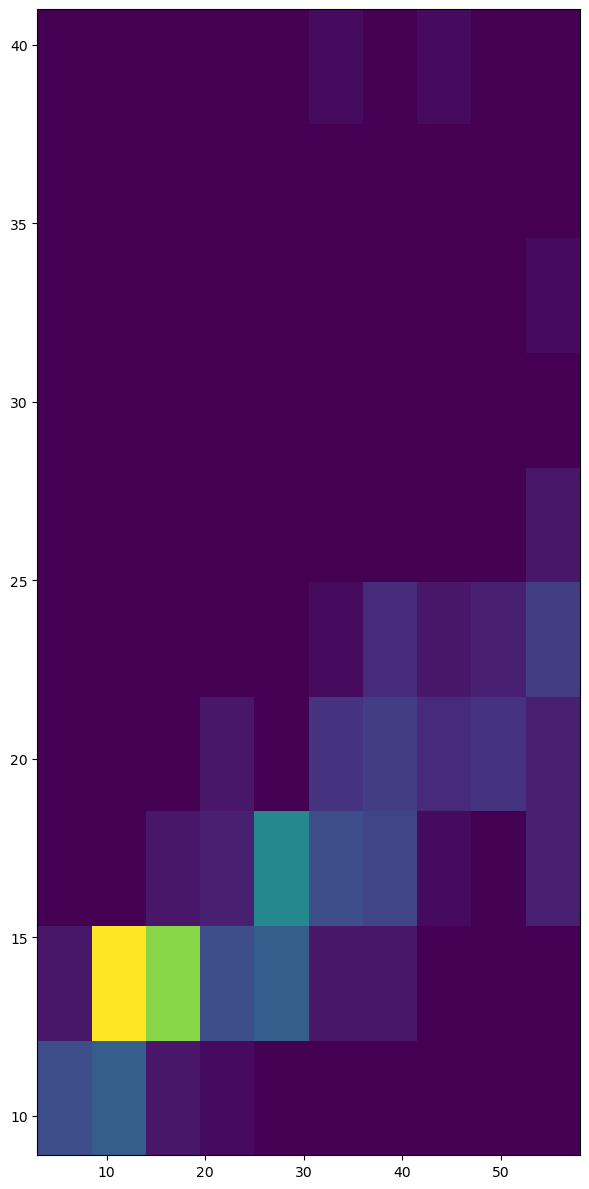

In [21]:
x = filter_birds['MaxBodyMass']
y = filter_birds['MaxLength']

fig, ax = plt.subplots(tight_layout=True)
hist = ax.hist2d(x, y)

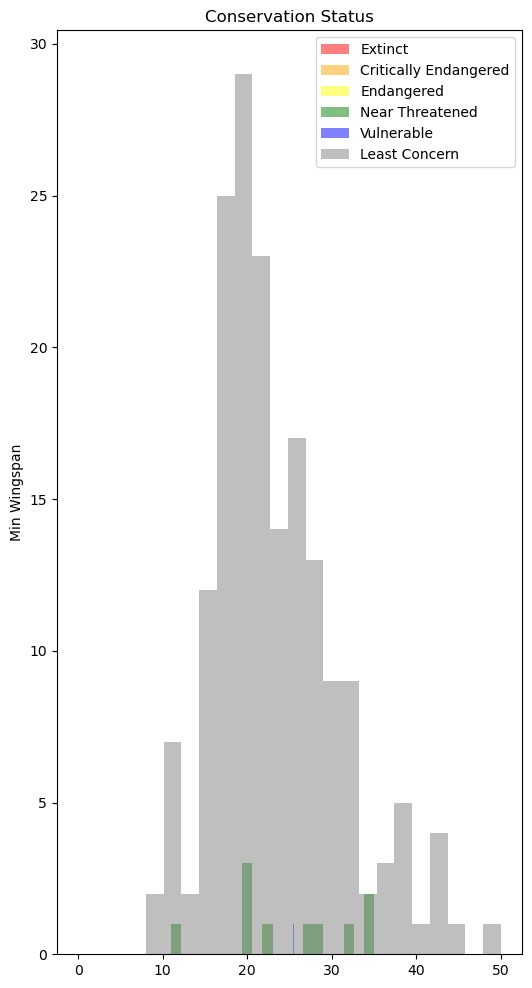

In [22]:
x1 = filter_birds.loc[filter_birds.ConservationStatus=='EX', 'MinWingspan']
x2 = filter_birds.loc[filter_birds.ConservationStatus=='CR', 'MinWingspan']
x3 = filter_birds.loc[filter_birds.ConservationStatus=='EN', 'MinWingspan']
x4 = filter_birds.loc[filter_birds.ConservationStatus=='NT', 'MinWingspan']
x5 = filter_birds.loc[filter_birds.ConservationStatus=='VU', 'MinWingspan']
x6 = filter_birds.loc[filter_birds.ConservationStatus=='LC', 'MinWingspan']

kwargs = dict(alpha=0.5, bins=20)

plt.hist(x1, **kwargs, color='red', label='Extinct')
plt.hist(x2, **kwargs, color='orange', label='Critically Endangered')
plt.hist(x3, **kwargs, color='yellow', label='Endangered')
plt.hist(x4, **kwargs, color='green', label='Near Threatened')
plt.hist(x5, **kwargs, color='blue', label='Vulnerable')
plt.hist(x6, **kwargs, color='gray', label='Least Concern')

plt.gca().set(title='Conservation Status', ylabel='Min Wingspan')
plt.legend()

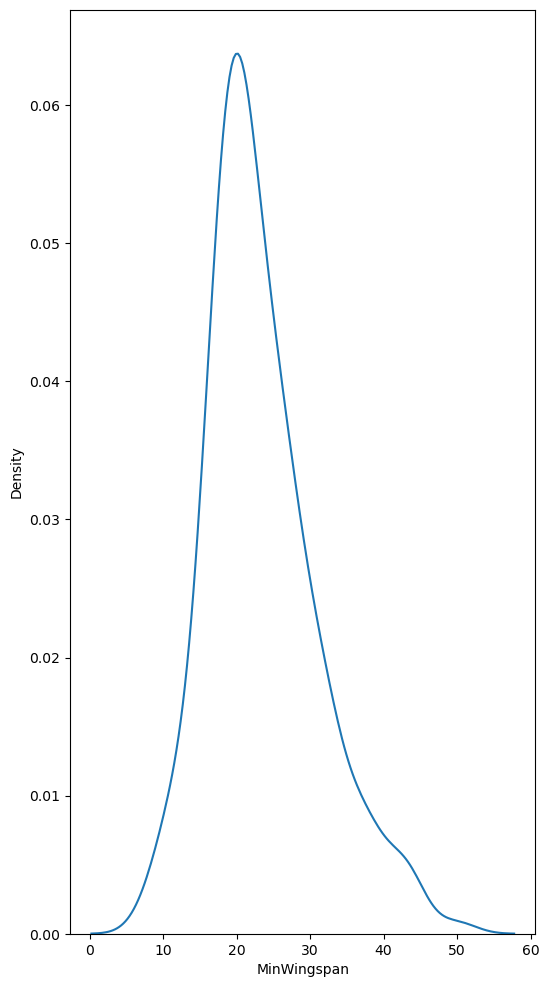

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.kdeplot(filter_birds['MinWingspan'])
plt.show()

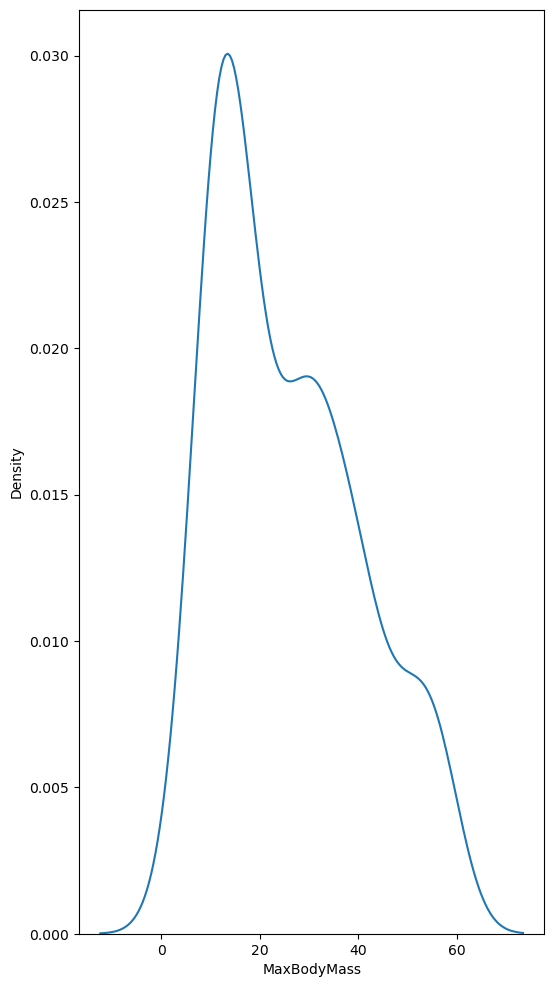

In [26]:
sns.kdeplot(filter_birds['MaxBodyMass'])
plt.show()

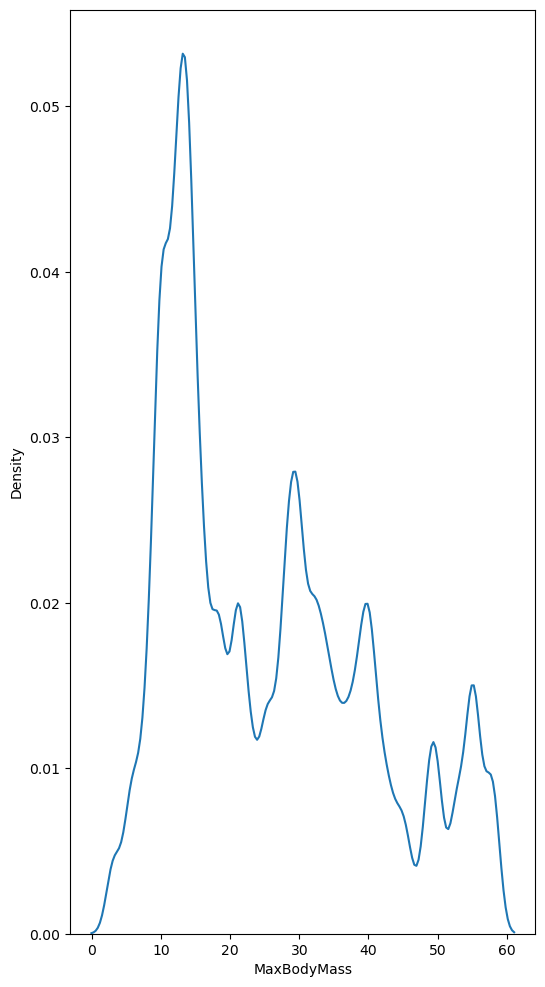

In [27]:
sns.kdeplot(filter_birds['MaxBodyMass'], bw_adjust=.2)
plt.show()

/var/folders/4k/mygtm1_96r7g77fdsqmbmb4m0000gn/T/ipykernel_48122/2802995806.py:1: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(


<Axes: xlabel='MaxBodyMass', ylabel='Density'>

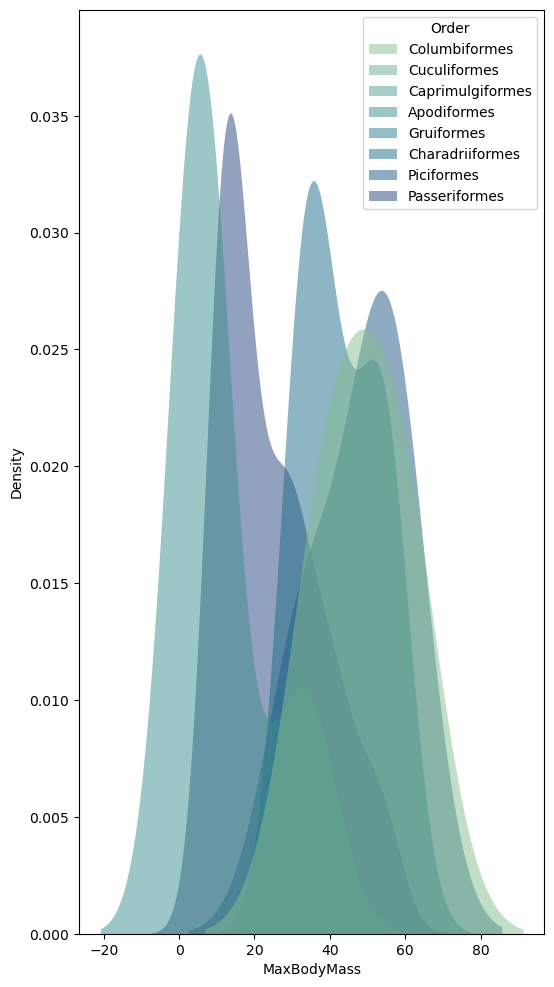

In [28]:
sns.kdeplot(
   data=filter_birds, x="MaxBodyMass", hue="Order",
   fill=True, common_norm=False, palette="crest",
   alpha=.5, linewidth=0,
)

/var/folders/4k/mygtm1_96r7g77fdsqmbmb4m0000gn/T/ipykernel_48122/3921500598.py:1: UserWarning: KDE cannot be estimated (0 variance or perfect covariance). Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=filter_birds, x="MinLength", y="MaxLength", hue="ConservationStatus")


<Axes: xlabel='MinLength', ylabel='MaxLength'>

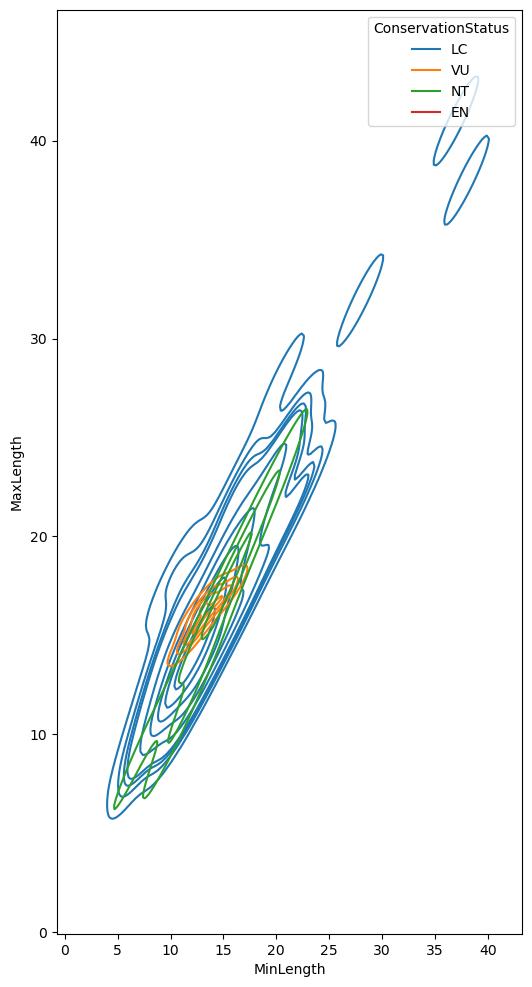

In [29]:
sns.kdeplot(data=filter_birds, x="MinLength", y="MaxLength", hue="ConservationStatus")